In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

df = pd.read_csv('colresult3.csv')

In [33]:
print(df)

          발매가  브랜드  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  \
0      259000    3  21    0      4          1     9     0     0     0     0   
1      259000    3  21    0      4          1     9     0     0     0     0   
2      259000    3  21    0      4          1     9     0     0     0     0   
3      259000    3  21    0      4          1     9     0     0     0     0   
4      259000    3  21    0      4          1     9     0     0     0     0   
...       ...  ...  ..  ...    ...        ...   ...   ...   ...   ...   ...   
43948  209000    5  28   40     10          1     9     0     0     0     0   
43949  209000    5  28   40     10          1     9     0     0     0     0   
43950  209000    5  28   40     10          1     9     0     0     0     0   
43951  209000    5  28   40     10          1     9     0     0     0     0   
43952  209000    5  28   40     10          1     9     0     0     0     0   

       type  day  
0       1.0    0  
1       1.0  

In [44]:
df2 = df[(df['day'] == 1)]

In [45]:
print(df2)

          발매가  브랜드  라인  콜라보  month  color_num  col1  col2  col3  col4  col5  \
1      259000    3  21    0      4          1     9     0     0     0     0   
93     149000    3  24    0      9          1     9     0     0     0     0   
185    139000    3  17    0      5          2     9     3     0     0     0   
278    149000    3  24    0      2          1     9     0     0     0     0   
368     99000    3  18    0      1          1     9     0     0     0     0   
...       ...  ...  ..  ...    ...        ...   ...   ...   ...   ...   ...   
43493  284400    4  25    0     12          1     6     0     0     0     0   
43584  600000    4  26   39      9          2     3     5     0     0     0   
43676  309000    4  25    0      4          1     7     0     0     0     0   
43768  289000    4  25    0     10          1     9     0     0     0     0   
43861  209000    5  28   40     10          1     9     0     0     0     0   

       type  day  
1       1.0    1  
93      1.0  

In [46]:
df2 = df2.sample(frac=1).reset_index(drop=True)

In [47]:
yx = df2["type"]

In [48]:
X = df2[['발매가', '라인', '브랜드', '콜라보', 'month', 'color_num']]
X = np.asarray(X).astype(np.int32)
y = np.empty((477,3))

In [49]:
for i in range(477):
    if yx[i] == 0.0:
        y[i] = [1, 0, 0]
    elif yx[i] == 1.0:
        y[i] = [0, 1, 0]
    else:
        y[i] = [0, 0, 1]

In [50]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [51]:
model = tf.keras.Sequential()  
model.add(layers.Dense(12, input_shape=(6,)))  
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.01))        

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.01))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) 

# 모델 구축
model.compile(
    loss= 'categorical_crossentropy', 
    optimizer="adam",   
    metrics=['accuracy'])  

In [52]:
hist = model.fit(
    train_x, train_y,
    batch_size = 10,  
    epochs = 100,      
    validation_split = 0.1,
    shuffle = False,

    verbose=1)  

# 테스트 데이터로 성능평가
score = model.evaluate(test_x, test_y)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/100
26/26 [==============================] - 0s 7ms/step - loss: 1595.8408 - accuracy: 0.3658 - val_loss: 387.2178 - val_accuracy: 0.5862
Epoch 2/100
26/26 [==============================] - 0s 2ms/step - loss: 631.9058 - accuracy: 0.4047 - val_loss: 160.6760 - val_accuracy: 0.5862
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 284.5261 - accuracy: 0.3774 - val_loss: 32.2517 - val_accuracy: 0.5862
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 331.1950 - accuracy: 0.3813 - val_loss: 92.5226 - val_accuracy: 0.2759
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 265.0100 - accuracy: 0.4008 - val_loss: 30.9262 - val_accuracy: 0.5862
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 177.3894 - accuracy: 0.3930 - val_loss: 79.7493 - val_accuracy: 0.5862
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 154.8106 - accuracy: 0.3930 - val_loss: 13.3956 - val_accura

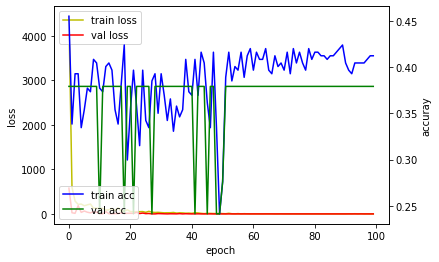

In [43]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [31]:
y_pred = model.predict(test_x)

In [408]:
print(y_pred)

[[0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22041102]
 [0.29570094 0.483888   0.22

In [353]:
y_class = y_pred.argmax(axis=-1)
y_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [354]:
print(yx_test)

[2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 2.0, 2.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 2.0, 0.0, 1.0, 2.0, 1.0, 0.0]


In [261]:
yx_test = list(yx_test)
print(yx_test)

[2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 2.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 2.0, 2.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 2.0, 0.0, 1.0, 2.0, 1.0, 0.0]


In [262]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix, f1_score
precision = precision_score(yx_test,y_class, average= "macro")
print(precision)

0.13800424628450106


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [263]:
recall = recall_score(yx_test,y_class, average= "macro")
print(recall)

0.3333333333333333


In [264]:
print(f1_score(yx_test,y_class, average= "macro"))

0.1951951951951952
